In [10]:
# Prepare dataset
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    result = [row[index] for row in data]

    return result

In [46]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    # n = len(data)
    
    # Get tv (column index = 0)
    tv_data = get_column(data, 0)

    # get radio (column index = 1)
    radio_data = get_column(data, 1)

    # get newspaper (column index = 2)
    newspaper_data = get_column(data, 2)

    # get sales (column index = 3)
    sales_data = get_column(data, 3)

    # build X inpu and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y


X, y = prepare_data('advertising.csv')


In [23]:
# Question 1
X, y = prepare_data('advertising.csv')
lst = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(lst)

[624.1, 175.1, 300.5, 78.9]


In [64]:
def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b = 0
    
    return (0.016992259082509283, 0.0070783670518262355,
            -0.002307860847821344 , 0)

def predict(x1, x2, x3, w1, w2, w3, b):
    return w1*x1 + w2*x2 + w3*x3 + b

def compute_loss_mse(y, y_hat):
    return (y - y_hat)**2

def compute_gradient_wi(xi, y, y_hat):
    return 2*xi*(y_hat - y)

def compute_gradient_b(y, y_hat):
    return 2*(y_hat - y)

def update_weight_wi(wi, dl_dwi, lr=1e-5):
    return wi - lr*dl_dwi

def update_weight_b(b, dl_db, lr=1e-5):
    return b - lr*dl_db


def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    n = len(y_data)
    for epoch in range(epoch_max):
        for i in range(n):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # logging
            losses.append(loss)


    return (w1, w2, w3, b, losses)
    

In [48]:
# Question 2:
y_hat = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)

print(y_hat)

1.0


In [65]:
# Question 3:
l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


In [34]:
# Question 4:
# MSE
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [35]:
# Question 5:
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [38]:
# Question 6:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

1.000005


In [40]:
# Question 7:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)
print(after_wi)

0.50001
1.000005


Text(0, 0.5, 'Loss')

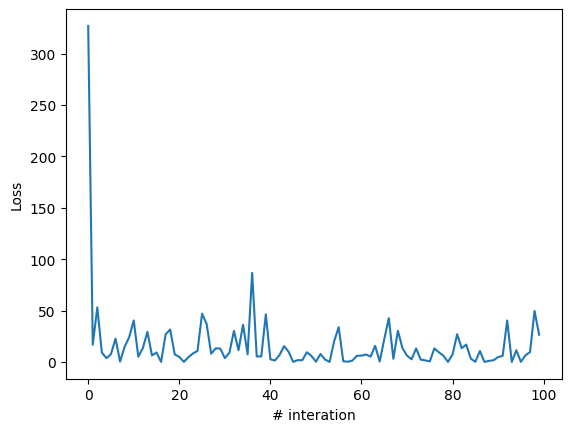

In [55]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel('# interation')
plt.ylabel('Loss')

In [56]:
# Question 8:
X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [59]:
# Question 9:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


In [66]:
def compute_loss_mae(y_hat, y):
    return abs(y_hat - y)

l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


In [71]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    n = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(n):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute outpur
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # accumulate loss
            loss_total += loss

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # accumulate gradient w1, w2, w3, b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # After processing n samples, update parameters
        w1 = update_weight_wi(w1, dw1_total / n, lr)
        w2 = update_weight_wi(w2, dw2_total / n, lr)
        w3 = update_weight_wi(w3, dw3_total / n, lr)
        b = update_weight_b(b, db_total / n, lr)
    
        # logging
        losses.append(loss_total / n)
    return (w1, w2, w3, b, losses)



[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

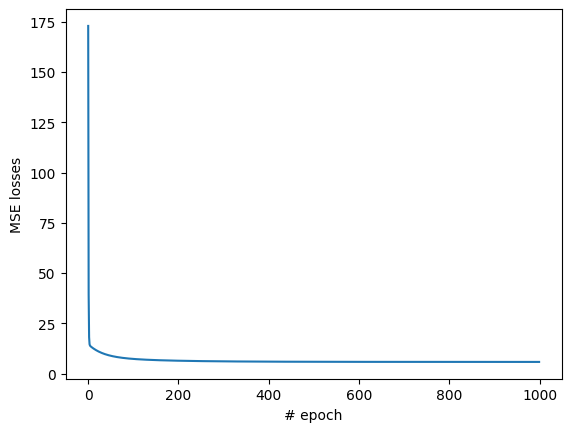

In [74]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y,
                                                               epoch_max=1000,
                                                               lr=1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("# epoch")
plt.ylabel("MSE losses")
plt.show()

In [75]:
# Question 11:
X, y = prepare_data('advertising.csv')

# using MSE loss
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y,
                                                               epoch_max=1000,
                                                               lr=1e-5)
print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


[12.537758993110772, 5.905253690937074, 3.7290201321746137, 3.280103342013847, 3.1836865214240593, 3.1504551681146706, 3.1282032310037176, 3.107834776878128, 3.0877653671823877, 3.067869077619822, 3.0482166503078565, 3.02883345816351, 3.0097268958233707, 2.990926260388694, 2.9724018229858893, 2.954147483295836, 2.936159497829541, 2.9184793882434996, 2.9013201899015386, 2.8848065446993694, 2.8692913979087806, 2.8540808729447424, 2.8391539128581824, 2.824441258695949, 2.809939593214031, 2.795661552510065, 2.781611479829696, 2.7677616004414416, 2.7541088214511316, 2.7406510256334013, 2.727970116901554, 2.7155029638904806, 2.703211839174965, 2.6910940299623816, 2.6792629854501695, 2.6676459659520204, 2.6561923391983115, 2.645064404704684, 2.6341944320960224, 2.623535606535408, 2.6130255229490116, 2.6026618964920454, 2.592442478315787, 2.5823650549969863, 2.5725241259925906, 2.562865212228721, 2.553339917055549, 2.5439461929615637, 2.5347454167598515, 2.525816782277532, 2.517347376120849, 2

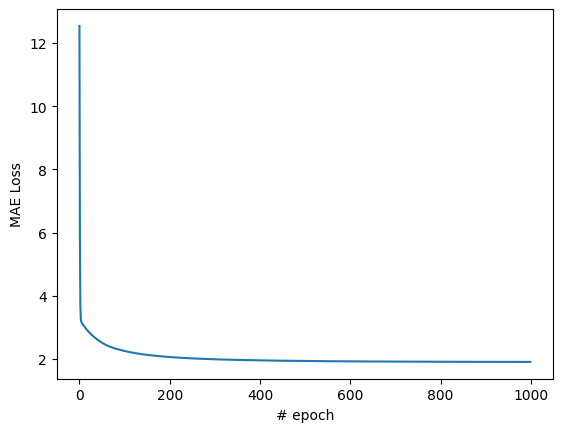

In [76]:
# Using MAE

def implement_linear_regression_nsamples_mae(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    n = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(n):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute outpur
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mae(y, y_hat)

            # accumulate loss
            loss_total += loss

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # accumulate gradient w1, w2, w3, b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # After processing n samples, update parameters
        w1 = update_weight_wi(w1, dw1_total / n, lr)
        w2 = update_weight_wi(w2, dw2_total / n, lr)
        w3 = update_weight_wi(w3, dw3_total / n, lr)
        b = update_weight_b(b, db_total / n, lr)
    
        # logging
        losses.append(loss_total / n)
    return (w1, w2, w3, b, losses)

(w1, w2, w3, b, losses) = implement_linear_regression_nsamples_mae(X, y,
                                                                   epoch_max=1000,
                                                                   lr=1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("# epoch")
plt.ylabel('MAE Loss')
plt.show()



In [82]:
# Restructure X features and y target (with x0 = 1)
def prepare_data_new(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    
    # get tv (index column = 0)
    tv_data = get_column(data, 0)

    # get radio (index column = 1)
    radio_data = get_column(data, 1)

    # get newspaper (index column = 2)
    newspaper_data = get_column(data, 2)

    # get sales (index column = 3)
    sales_data = get_column(data, 3)

    # build X input and y output for training
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data

    return X, y

def initialize_params():
    bias = 9
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)

    return [0, -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]
    # return bias, w1, w2, w3

print(prepare_data_new('advertising.csv'))

([[1, 230.1, 37.8, 69.2], [1, 44.5, 39.3, 45.1], [1, 17.2, 45.9, 69.3], [1, 151.5, 41.3, 58.5], [1, 180.8, 10.8, 58.4], [1, 8.7, 48.9, 75.0], [1, 57.5, 32.8, 23.5], [1, 120.2, 19.6, 11.6], [1, 8.6, 2.1, 1.0], [1, 199.8, 2.6, 21.2], [1, 66.1, 5.8, 24.2], [1, 214.7, 24.0, 4.0], [1, 23.8, 35.1, 65.9], [1, 97.5, 7.6, 7.2], [1, 204.1, 32.9, 46.0], [1, 195.4, 47.7, 52.9], [1, 67.8, 36.6, 114.0], [1, 281.4, 39.6, 55.8], [1, 69.2, 20.5, 18.3], [1, 147.3, 23.9, 19.1], [1, 218.4, 27.7, 53.4], [1, 237.4, 5.1, 23.5], [1, 13.2, 15.9, 49.6], [1, 228.3, 16.9, 26.2], [1, 62.3, 12.6, 18.3], [1, 262.9, 3.5, 19.5], [1, 142.9, 29.3, 12.6], [1, 240.1, 16.7, 22.9], [1, 248.8, 27.1, 22.9], [1, 70.6, 16.0, 40.8], [1, 292.9, 28.3, 43.2], [1, 112.9, 17.4, 38.6], [1, 97.2, 1.5, 30.0], [1, 265.6, 20.0, 0.3], [1, 95.7, 1.4, 7.4], [1, 290.7, 4.1, 8.5], [1, 266.9, 43.8, 5.0], [1, 74.7, 49.4, 45.7], [1, 43.1, 26.7, 35.1], [1, 228.0, 37.7, 32.0], [1, 202.5, 22.3, 31.6], [1, 177.0, 33.4, 38.7], [1, 293.6, 27.7, 1.8], [

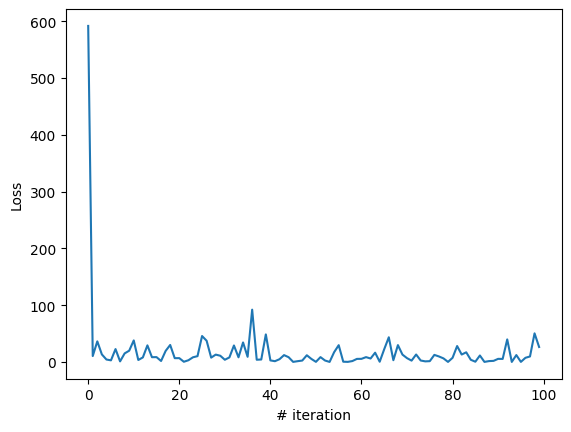

In [96]:
# Implement linear regression with x0=1

def implement_linear_regression_with_x0(X_feature, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    n = len(y_output)
    for epoch in range(epoch_max):
        # print('epoch', epoch)
        for i in range(n):
            # get a sample, i.e row i
            features_i = X_feature[i]
            y = y_output[i]

            # compute output
            y_hat = predict(features_i, weights)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # update params
            weights = update_weight(weights, dl_dweights, lr)

            # logging
            losses.append(loss)
    return weights, losses

def compute_loss_mse(y_hat, y):
    return (y_hat - y)**2

def predict(X_features, weights):
    return sum([f*w for f, w in zip(X_features, weights)])

def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = [2*xi*(y_hat - y) for xi in X_features]
    return dl_dweights

def update_weight(weights, dl_dweights, lr):
    weights = [w - lr*dw for w, dw in zip(weights, dl_dweights)]

    return weights

X, y = prepare_data_new('advertising.csv')
W, L = implement_linear_regression_with_x0(X, y)
plt.plot(L[:100])
plt.xlabel('# iteration')
plt.ylabel('Loss')
plt.show()

In [97]:
print(L[9999])

31.339223408109927


In [106]:
# Excercise 5: Feature scaling

def prepare_data_scaling(filename_dataset):
    data = np.genfromtxt(filename_dataset, delimiter=',', skip_header=1).tolist()

    # get tv
    tv_data = get_column(data, 0)

    # get radio
    radio_data = get_column(data, 1)

    # get newspaper
    newspaper_data = get_column(data, 2)

    # get sales
    sales_data = get_column(data, 3)

    # Scale data - only for features
    (tv_data, radio_data,  newspaper_data), (max_data_1, max_data_2, max_data_3, min_data_1, min_data_2, min_data_3) = min_max_saling(tv_data, radio_data, newspaper_data)

    # build X input and y output for training
    # create list of features for input
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data

    return X, y


def min_max_saling(data1, data2, data3):
    max_data_1 = max(data1)
    max_data_2 = max(data2)
    max_data_3 = max(data3)

    min_data_1 = min(data1)
    min_data_2 = min(data2)
    min_data_3 = min(data3)

    data1 = [(x - min_data_1) / (max_data_1 - min_data_1) for x in data1]
    data2 = [(x - min_data_2) / (max_data_2 - min_data_2) for x in data2]
    data3 = [(x - min_data_3) / (max_data_3 - min_data_3) for x in data3]    

    return (data1, data2, data3), (max_data_1, max_data_2, max_data_3, min_data_1, min_data_2, min_data_3) 
       


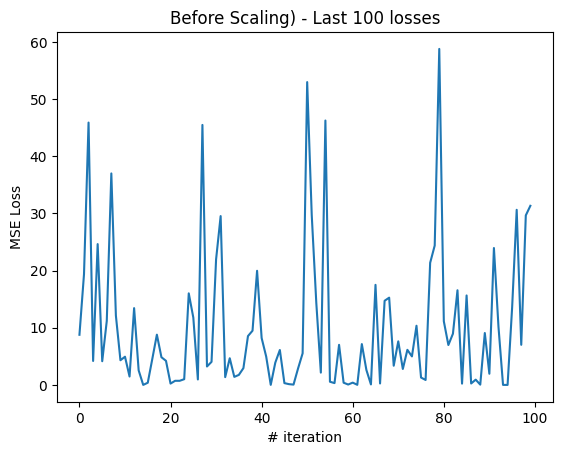

In [107]:

X, y = prepare_data_new('advertising.csv')
W, L = implement_linear_regression_with_x0(X, y)
plt.plot(L[-100:])
plt.xlabel('# iteration')
plt.ylabel('MSE Loss')
plt.title('Before Scaling) - Last 100 losses')
plt.show()

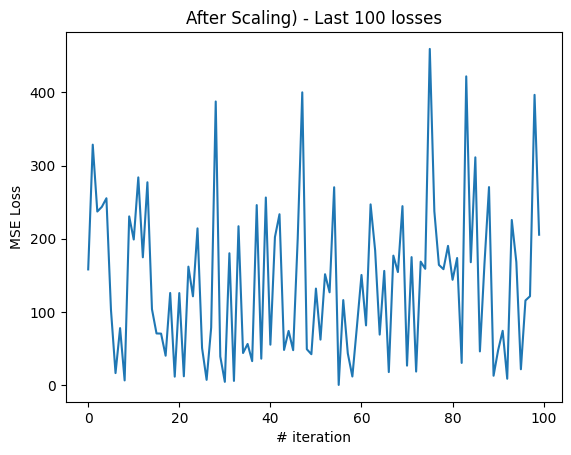

In [110]:
X_after, y_after = prepare_data_scaling('advertising.csv')

W, L = implement_linear_regression_with_x0(X_after, y_after)
plt.plot(L[-100:])
plt.xlabel('# iteration')
plt.ylabel('MSE Loss')
plt.title('After Scaling) - Last 100 losses')
plt.show()